In [4]:
#Setting our dependencies 
import pandas as pd
import csv 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
import math
import urllib
import random

#Introducing citipy
from citipy import citipy

In [5]:
#Setting our output file 
output_data_file = "OutPutFile.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [10]:
# OpenWeatherMap API Key
api_key = "ce1d4b8a69f21e439284026426d69013"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=ribeira%20grande
Processing Record 2 of Set 1 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=yellowknife
Processing Record 3 of Set 1 | viligili
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=viligili
City not found. Skipping...
Processing Record 4 of Set 1 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=hithadhoo
Processing Record 5 of Set 1 | peniche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=peniche
Processing Record 6 of Set 1 | chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d6

Processing Record 2 of Set 2 | nioro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=nioro
Processing Record 3 of Set 2 | conceicao do araguaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=conceicao%20do%20araguaia
Processing Record 4 of Set 2 | ambon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=ambon
Processing Record 5 of Set 2 | tshane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=tshane
Processing Record 6 of Set 2 | bargal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=bargal
City not found. Skipping...
Processing Record 7 of Set 2 | abalak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=abalak
Processing Record 8 of Set 2 | port elizabeth
http://a

Processing Record 4 of Set 3 | khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=khatanga
Processing Record 5 of Set 3 | matay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=matay
Processing Record 6 of Set 3 | khor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=khor
Processing Record 7 of Set 3 | belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=belushya%20guba
City not found. Skipping...
Processing Record 8 of Set 3 | ilula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=ilula
Processing Record 9 of Set 3 | maloshuyka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=maloshuyka
City not found. Skipping...
Processing Record 10 of Set 3 | kang

Processing Record 7 of Set 4 | laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=laguna
Processing Record 8 of Set 4 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=castro
Processing Record 9 of Set 4 | san quintin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=san%20quintin
Processing Record 10 of Set 4 | namatanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=namatanai
Processing Record 11 of Set 4 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=kavieng
Processing Record 12 of Set 4 | araouane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=araouane
Processing Record 13 of Set 4 | tashtyp
http://api.openweathermap.org/data/2.5/weathe

Processing Record 9 of Set 5 | imeni poliny osipenko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=imeni%20poliny%20osipenko
Processing Record 10 of Set 5 | kandrian
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=kandrian
Processing Record 11 of Set 5 | vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=vaitupu
City not found. Skipping...
Processing Record 12 of Set 5 | college
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=college
Processing Record 13 of Set 5 | nileshwar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=nileshwar
Processing Record 14 of Set 5 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=kruisfontein
Processing Record 1

Processing Record 12 of Set 6 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=los%20llanos%20de%20aridane
Processing Record 13 of Set 6 | rawson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=rawson
Processing Record 14 of Set 6 | awjilah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=awjilah
Processing Record 15 of Set 6 | nyurba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=nyurba
Processing Record 16 of Set 6 | tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=tuatapere
Processing Record 17 of Set 6 | timmins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=timmins
Processing Record 18 of Set 6 | ngukurr
http://api.openweath

Processing Record 15 of Set 7 | airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=airai
Processing Record 16 of Set 7 | vaitape
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=vaitape
Processing Record 17 of Set 7 | techiman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=techiman
Processing Record 18 of Set 7 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=geraldton
Processing Record 19 of Set 7 | grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=grindavik
Processing Record 20 of Set 7 | keetmanshoop
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=keetmanshoop
Processing Record 21 of Set 7 | nantucket
http://api.openweathermap.org/data/2

Processing Record 19 of Set 8 | klyuchi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=klyuchi
Processing Record 20 of Set 8 | walvis bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=walvis%20bay
Processing Record 21 of Set 8 | boyolangu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=boyolangu
Processing Record 22 of Set 8 | bathurst
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=bathurst
Processing Record 23 of Set 8 | terpinnya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=terpinnya
Processing Record 24 of Set 8 | tabas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=tabas
Processing Record 25 of Set 8 | sainte-marie
http://api.openweathermap.org/data/

Processing Record 23 of Set 9 | vuktyl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=vuktyl
Processing Record 24 of Set 9 | williamstown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=williamstown
Processing Record 25 of Set 9 | ossora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=ossora
Processing Record 26 of Set 9 | tecklenburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=tecklenburg
Processing Record 27 of Set 9 | kiama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=kiama
Processing Record 28 of Set 9 | saint-louis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=saint-louis
Processing Record 29 of Set 9 | svetlyy
http://api.openweathermap.org/data/2

Processing Record 27 of Set 10 | camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=camacha
Processing Record 28 of Set 10 | nokaneng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=nokaneng
Processing Record 29 of Set 10 | manzhouli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=manzhouli
Processing Record 30 of Set 10 | kayes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=kayes
Processing Record 31 of Set 10 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=cabo%20san%20lucas
Processing Record 32 of Set 10 | nichinan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=nichinan
Processing Record 33 of Set 10 | buchanan
http://api.openweatherma

Processing Record 30 of Set 11 | kupang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=kupang
Processing Record 31 of Set 11 | erzin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=erzin
Processing Record 32 of Set 11 | nalut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=nalut
Processing Record 33 of Set 11 | myaundzha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=myaundzha
Processing Record 34 of Set 11 | kichera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=kichera
Processing Record 35 of Set 11 | la ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=la%20ronge
Processing Record 36 of Set 11 | comodoro rivadavia
http://api.openweathermap.org/data/2.5

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=gilbues
Processing Record 33 of Set 12 | lieksa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=lieksa
Processing Record 34 of Set 12 | la peca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=la%20peca
Processing Record 35 of Set 12 | baghdad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=baghdad
Processing Record 36 of Set 12 | punalur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=punalur
Processing Record 37 of Set 12 | billings
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e439284026426d69013&q=billings
Processing Record 38 of Set 12 | russell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ce1d4b8a69f21e4392

In [12]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()




City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64

In [13]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ribeira grande,40,PT,1522609200,72,38.52,-28.70,62.60,26.40
1,yellowknife,20,CA,1522609200,55,62.45,-114.38,8.60,10.29
2,hithadhoo,100,MV,1522610550,98,-0.60,73.08,86.00,9.64
3,peniche,0,PT,1522609200,55,39.36,-9.38,60.80,8.05
4,chuy,92,UY,1522610559,94,-33.69,-53.46,71.51,19.71


In [16]:
#Turn our sample data into 500
sample_city_data_pd =city_data_pd  .sample(500)

sample_city_data_pd.count()

City          500
Cloudiness    500
Country       500
Date          500
Humidity      500
Lat           500
Lng           500
Max Temp      500
Wind Speed    500
dtype: int64

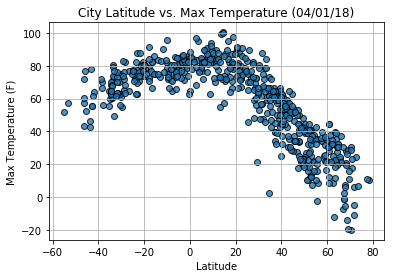

In [20]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_MaxTemp.png")

# Show plot
plt.show()

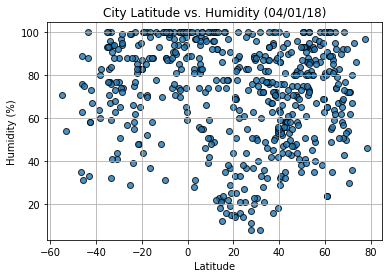

In [21]:
# Build the scatter plots for each city types
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Humidity.png")

# Show plot
plt.show()

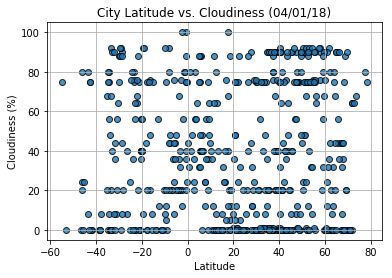

In [22]:
# Build the scatter plots for each city types
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

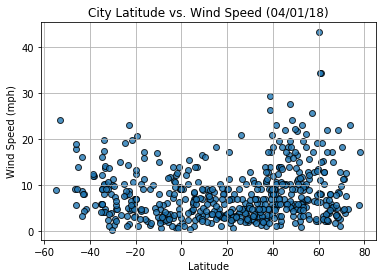

In [24]:
# Build the scatter plots for each city types
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_WindSpeed.png")

# Show plot
plt.show()